<a href="https://colab.research.google.com/github/Inamul-Hassan/Lending-Club-Loan-Analysis/blob/main/Lending_Club_Loan_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set(style = 'darkgrid')

In [3]:
dataInfo = pd.read_csv('/content/drive/MyDrive/Resume Projects/Datasets/lending_club_info.csv')

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Resume Projects/Datasets/lending_club_loan_two.csv')

In [5]:
dataInfo.head()

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade


In [6]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


### Basic exploration of data 

In [7]:
dataInfo.set_index('LoanStatNew',inplace=True)

In [8]:
def featureInfo(column='loan_status'):
  '''
  This function takes the column name as input and prints the the description of that column.
  default column='loan_status'
  '''
  print("{}: {}".format(column,dataInfo.loc[column]['Description']))

In [9]:
featureInfo()

loan_status: Current status of the loan


In [10]:
featureInfo('emp_title')

emp_title: The job title supplied by the Borrower when applying for the loan.*


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

### Understanding Features

#### Numeric Features

##### Correlation Between Numeric Features

In [12]:
data.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


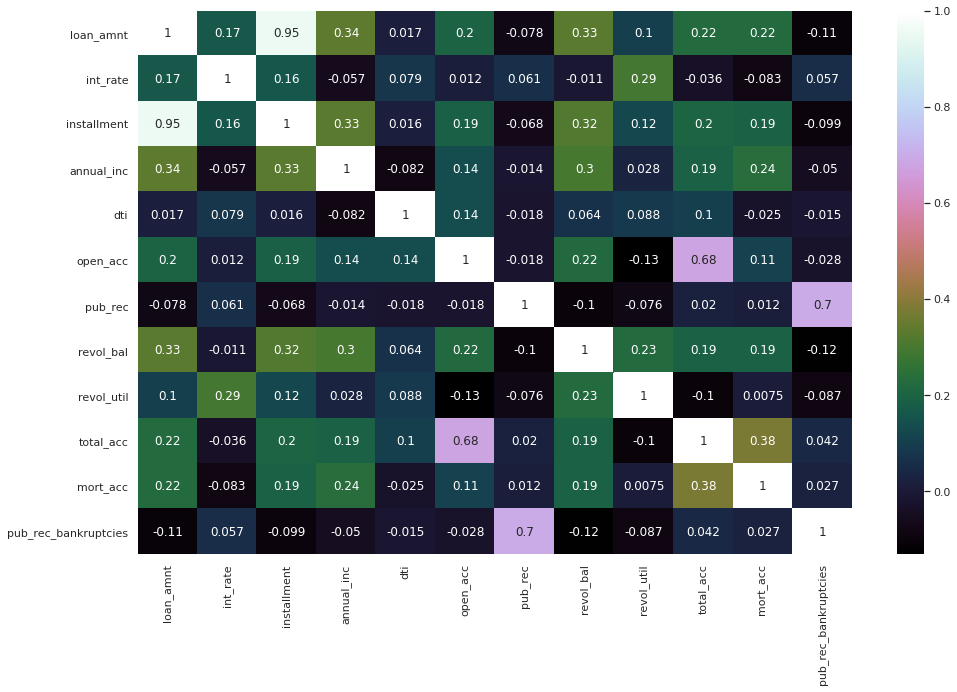

In [13]:
plt.figure(figsize=(16,10))
sns.heatmap(data=data.corr(),annot=True,cmap='cubehelix')

**Inference**
1.   From the heatmap we can see a almost perfect correlation between loan amount and installment.

2.   There is also some correlation between public records and public records bankruptcies

##### Loan Amount

In [14]:
featureInfo('loan_amnt')

loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


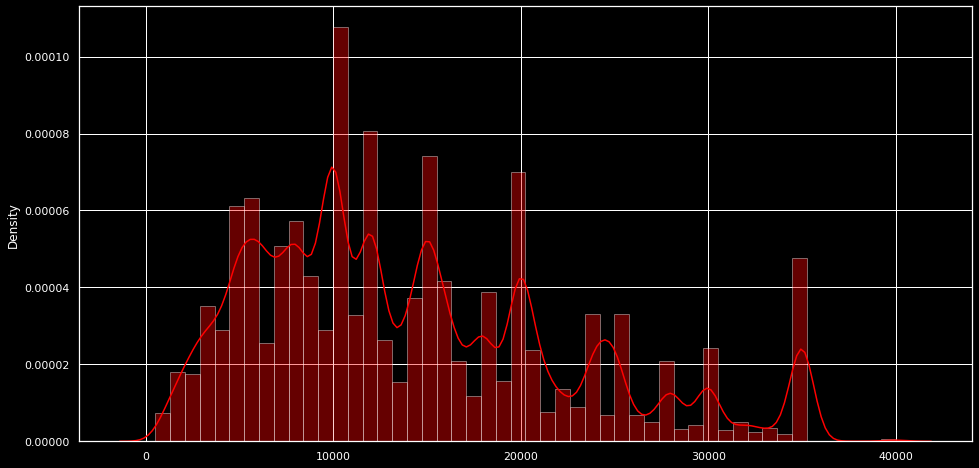

In [15]:
plt.style.use('dark_background')
plt.figure(figsize=(16,8))
sns.distplot(x = data['loan_amnt'],bins=50,color='red')
plt.show()

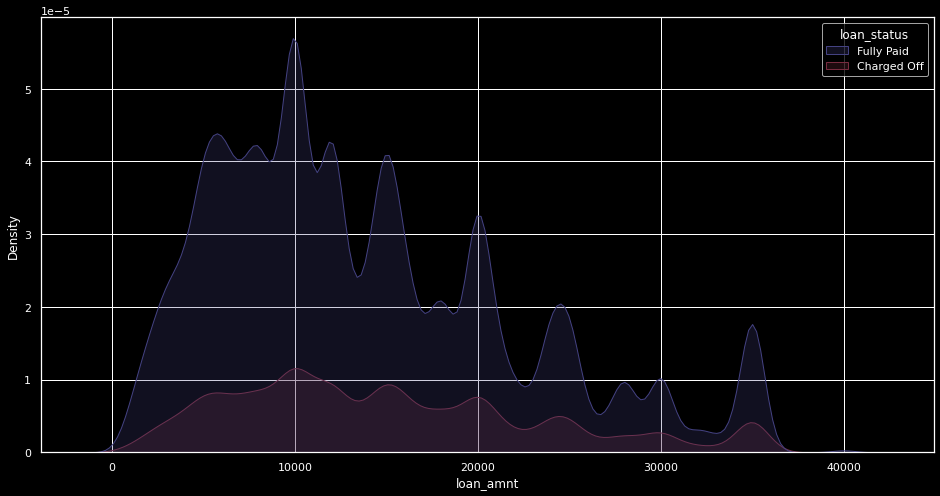

In [16]:
plt.figure(figsize=(16,8))
sns.kdeplot(x = data['loan_amnt'],shade=True,palette='icefire',hue=data['loan_status'])
plt.show()

In [17]:
data['loan_amnt'].describe()

count    396030.000000
mean      14113.888089
std        8357.441341
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

**Inference**

Loan Amount is in normal distribution, but there are some outliers in the upper 4th quantile.Thus We have to deal with the outliers but lets check other features and come to a conclusion.

##### Installment

In [18]:
featureInfo('installment')

installment: The monthly payment owed by the borrower if the loan originates.


In [19]:
data['installment'].describe()

count    396030.000000
mean        431.849698
std         250.727790
min          16.080000
25%         250.330000
50%         375.430000
75%         567.300000
max        1533.810000
Name: installment, dtype: float64

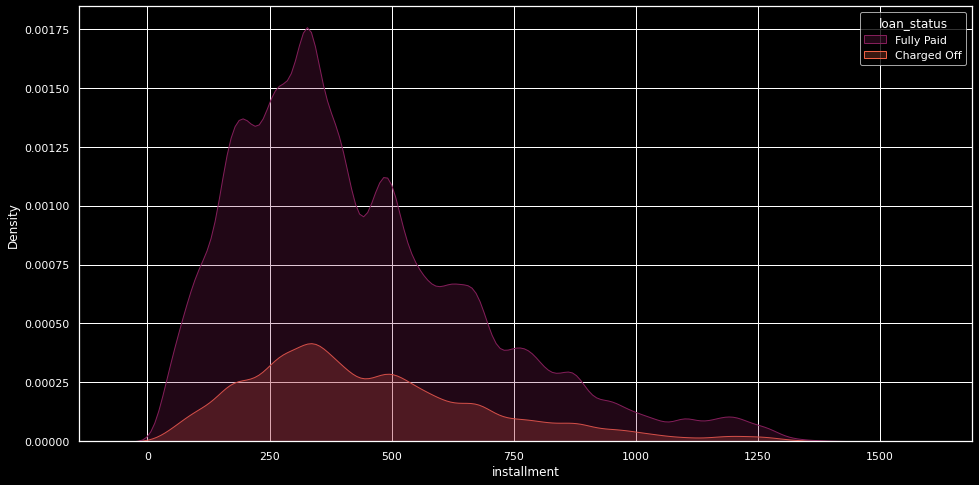

In [20]:
plt.figure(figsize=(16,8))
sns.kdeplot(x = data['installment'],shade=True,palette='rocket',hue=data['loan_status'])
plt.show()

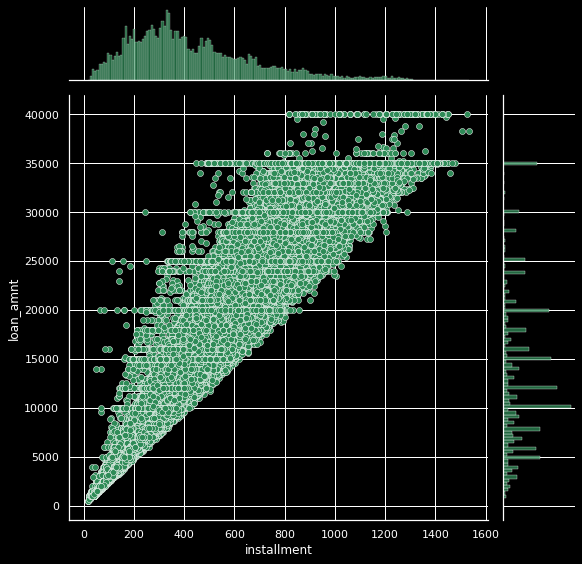

In [21]:
sns.jointplot(x='installment',y='loan_amnt',data=data,color='seagreen',height=8, ratio=5)

**Inference**

Its actually make sense now, the company fixes the installment amount based on the loan amount they borrowed.

Due to that we can see that, as the loan amount increases the installment also increases.

##### Public Records

In [22]:
featureInfo('pub_rec')

pub_rec: Number of derogatory public records


In [23]:
featureInfo('pub_rec_bankruptcies')

pub_rec_bankruptcies: Number of public record bankruptcies


In [24]:
data['pub_rec'].value_counts()

0.0     338272
1.0      49739
2.0       5476
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
86.0         1
40.0         1
17.0         1
15.0         1
24.0         1
Name: pub_rec, dtype: int64

In [25]:
data['pub_rec_bankruptcies'].value_counts()

0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

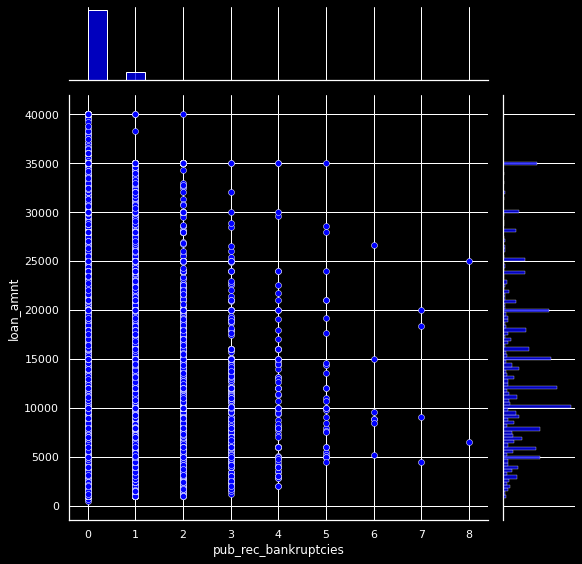

In [26]:
sns.jointplot(x='pub_rec_bankruptcies',y='loan_amnt',data=data,color='blue',height=8, ratio=5)

**Inference**

It makes to be a correction between number of availabe public records and the number of bankruptcies record from the publically available ones.

One more interesting thing is the loan amount decreases as the number of bankruptcies record increases.

##### Other

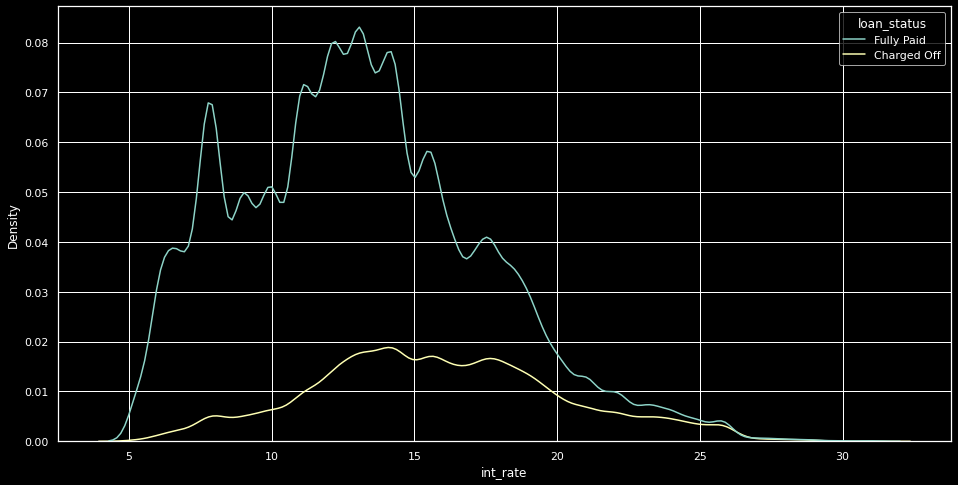

In [27]:
plt.figure(figsize=(16,8))
sns.kdeplot(x = data['int_rate'],color='#f8fc03',hue=data['loan_status'])
plt.show()

#### Categorical Features

##### Loan Status

In [28]:
featureInfo('loan_status')

loan_status: Current status of the loan


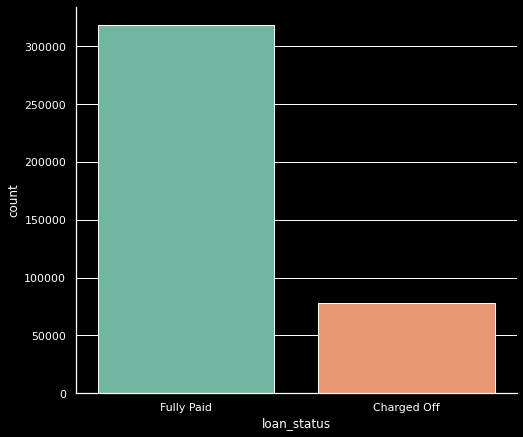

In [29]:
sns.catplot(kind='count',x='loan_status',height=6, aspect=1.2,data=data,palette='Set2')
plt.show()

In [30]:
data['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

**Inference**

We can see that the data is not balanced. We have 4 time more Fully Paid than Charged off.

But it is common in these type of datasets. Since the probability of soomeone charged off is less than someone fully paying the amount.

We can deal with this in many ways, upsampling, downsampeling, SMOTE and so on.

or we can leave the data as such and check the model performance, then we can do any sampling methods.

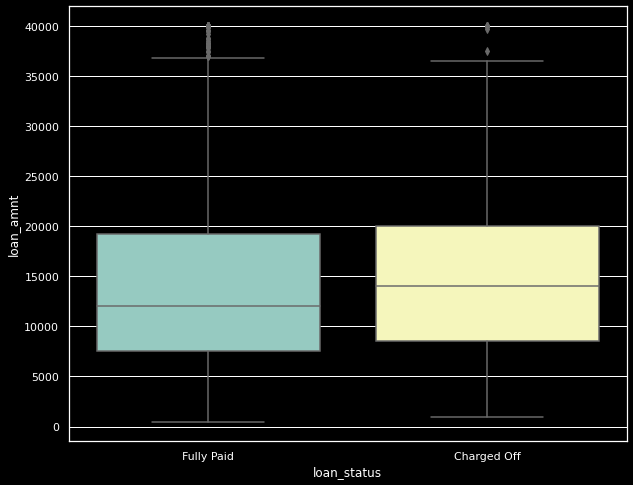

In [31]:
plt.figure(figsize=(10,8))
sns.boxplot(x='loan_status',y='loan_amnt',data=data)

**Inference Box Plot**



*   Our Data has outliers
*   The mean of th "carged off" is slightly greater than the mean of the "fully paid"/



##### Term

In [32]:
featureInfo('term')

term: The number of payments on the loan. Values are in months and can be either 36 or 60.


In [33]:
type(data['term'].iloc[0])

str

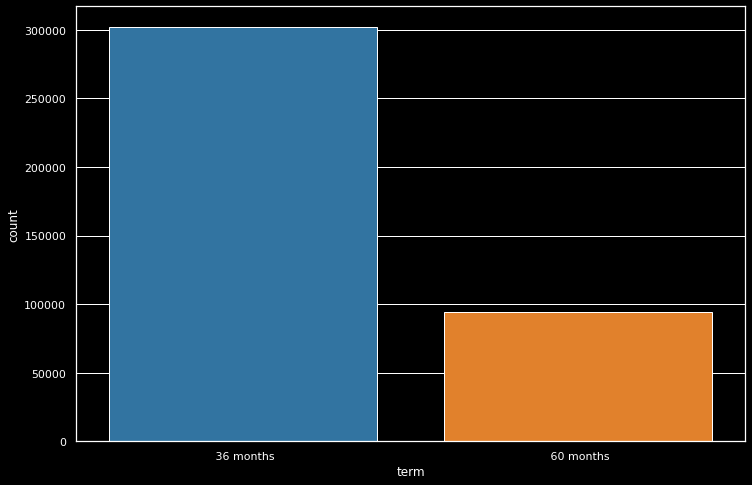

In [34]:
plt.figure(figsize=(12,8))
sns.countplot(x = data['term'],palette='tab10',)
plt.show()

In [35]:
data['term'].describe()

count         396030
unique             2
top        36 months
freq          302005
Name: term, dtype: object

**Inference**

Right away the column values are in string datatype. So we need to convert it to int and remove "month" from it.

Next we see that the data is not balanced. We have 3 time more 36months than 60 months. 

We can deal with this in many ways, upsampling, downsampeling, SMOTE and so on.

But we explore rest of the data first and come to a conclusion.









##### Grade and SubGrade

In [36]:
featureInfo('grade')

grade: LC assigned loan grade


In [37]:
featureInfo('sub_grade')

sub_grade: LC assigned loan subgrade


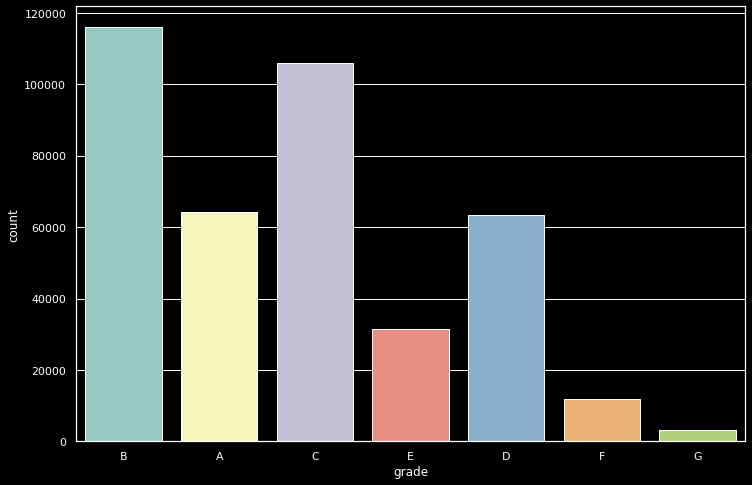

In [38]:
plt.figure(figsize=(12,8))
sns.countplot(x='grade',data=data)
plt.show()

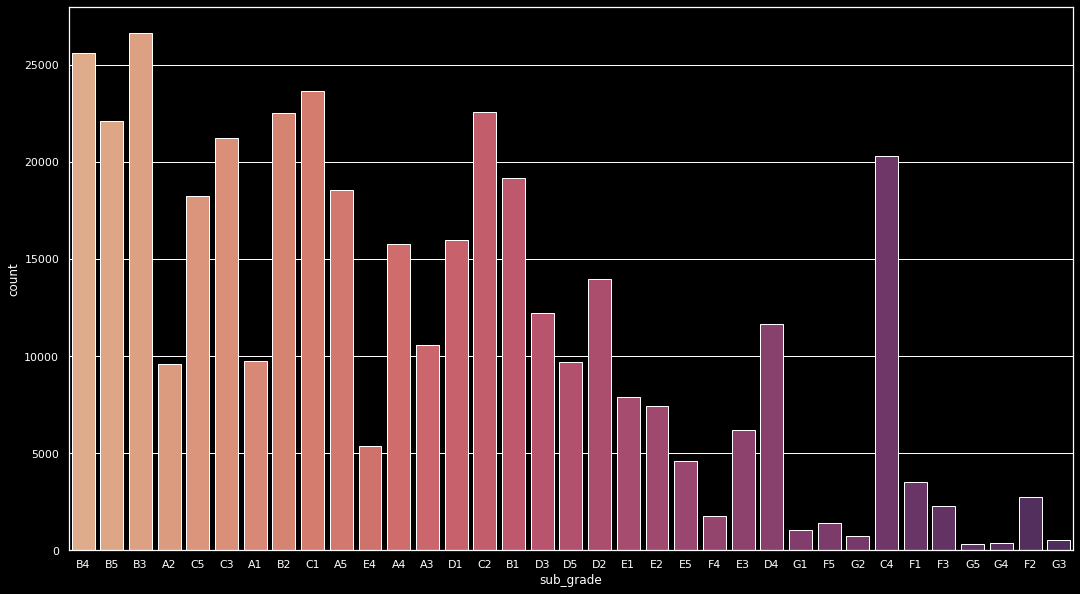

In [39]:
plt.figure(figsize=(18,10))
sns.countplot(x='sub_grade',data=data,palette='flare')
plt.show()

In [40]:
# Sortig

gradeOrder = sorted(data['grade'].unique())

subgradeOrder = sorted(data['sub_grade'].unique())

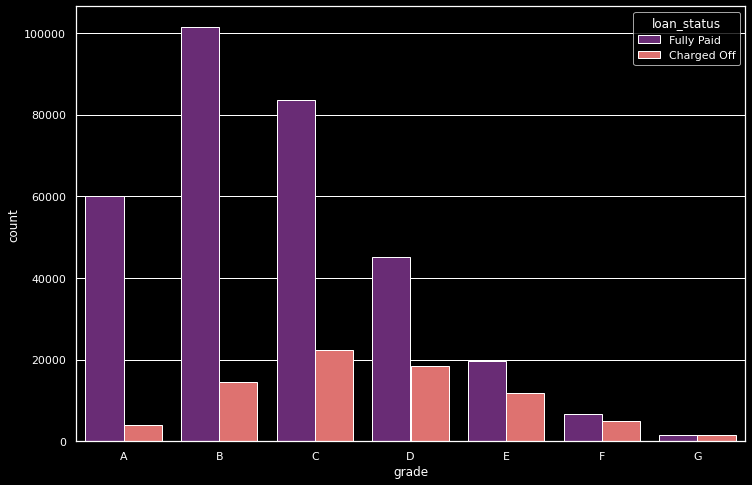

In [41]:
plt.figure(figsize=(12,8))

sns.countplot(x='grade',data=data,order=gradeOrder,hue='loan_status',palette='magma')

plt.show()

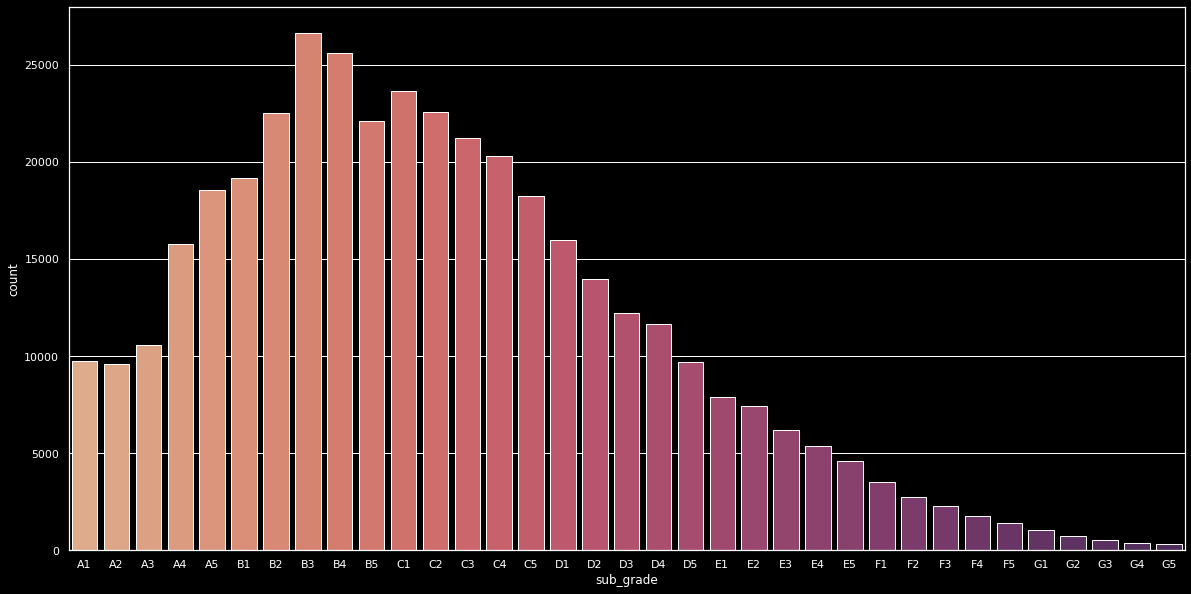

In [42]:
plt.figure(figsize=(20,10))
sns.countplot(x='sub_grade',data=data,order=subgradeOrder,palette='flare')
plt.show()

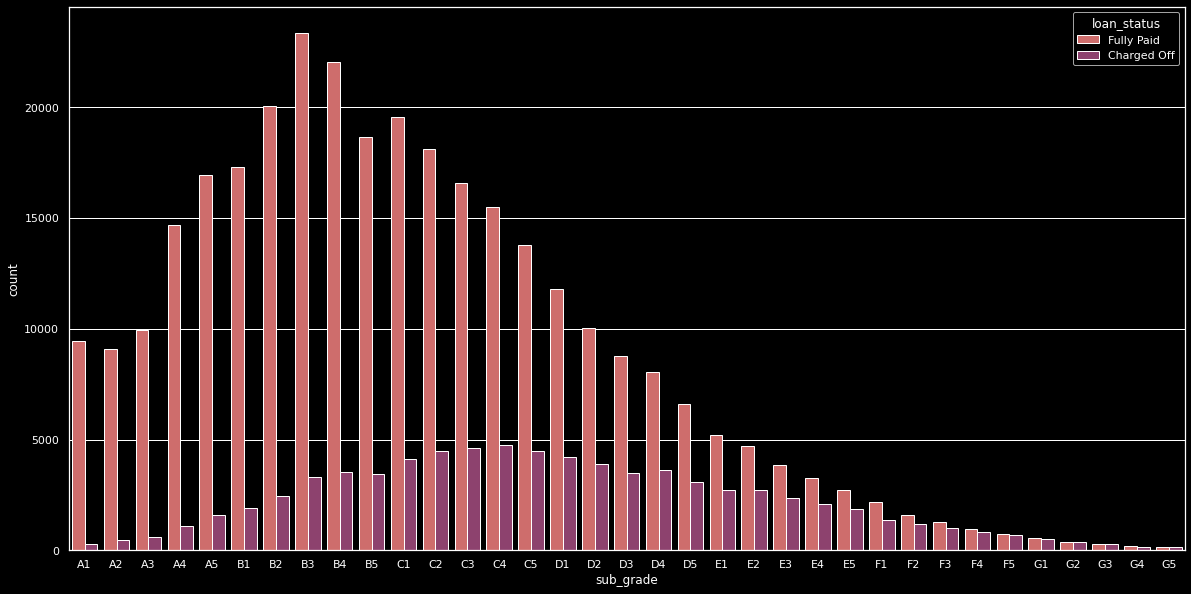

In [43]:
plt.figure(figsize=(20,10))
sns.countplot(x='sub_grade',data=data,order=subgradeOrder,palette='flare',hue='loan_status')
plt.show()

**Inference**



*   It looks like both the distributions are similar to gaussian distribution but litle bit skewed to left. 
*   It seems like the loans of grade F and G are more likely to be charged off compared to other grades. From the graph we can say that almost 50 percent of loans in these greades are charged off.



##### Home Ownership

In [44]:
featureInfo('home_ownership')

home_ownership: The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER


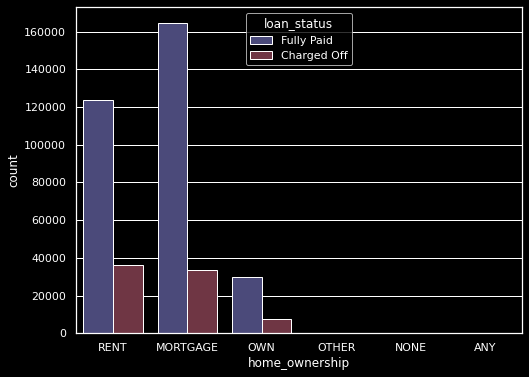

In [45]:
plt.figure(figsize=(8,6))
sns.countplot(x='home_ownership',data=data,hue='loan_status',palette='icefire')
plt.show()

In [46]:
data['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

**Inference**

We can see that the last 3 categories have very less data.("other","none","any")
And all three has kind off similar meaning.
we can merge all three together.

##### Employee Title

In [47]:
featureInfo('emp_title')

emp_title: The job title supplied by the Borrower when applying for the loan.*


In [48]:
data['emp_title'].value_counts()

Teacher                        4389
Manager                        4250
Registered Nurse               1856
RN                             1846
Supervisor                     1830
                               ... 
Kaiser Permanent Hospital         1
Platinum Security                 1
Healthport Technologies LLC       1
Trust Admin Officer               1
Lead Tech.                        1
Name: emp_title, Length: 173105, dtype: int64

In [49]:
data['emp_title'].nunique()

173105

**Inference**

There are too many categories. We cant encode each and everyone of them. We have to drop this column.

##### Employee Length

In [50]:
featureInfo('emp_length')

emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [51]:
data['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

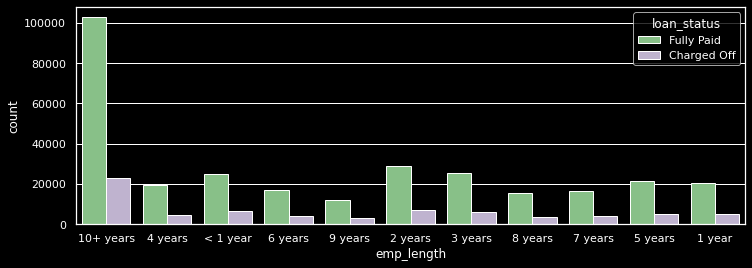

In [52]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=data,hue='loan_status',palette='Accent')

**Inference**

There seem to be a trend in this data.
No matter the length of the employment there are certain percentage of loan charged of in each category. Lets check the exact percentage to confirm our hypothesis.

In [53]:
fullyPaid = data[data['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [54]:
chargedOff = data[data['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

In [55]:
percentage = chargedOff/fullyPaid

In [56]:
percentage

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

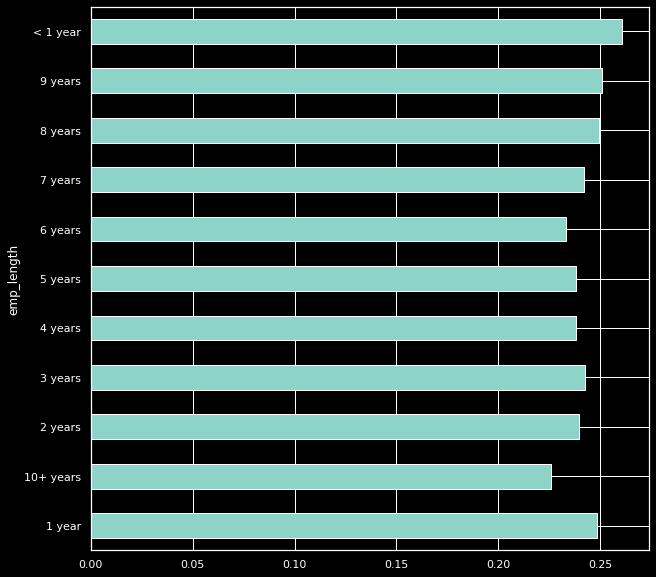

In [57]:
plt.figure(figsize=(10,10))
percentage.plot(kind='barh')

**Inference**

Our hypothesis is proved.
No matter the employee length the charged off percentage for all the category is almost same. Which means that this column will contribute very less to the final model. 

### Preprocessing

#### Dealing with missing data

In [58]:
data.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

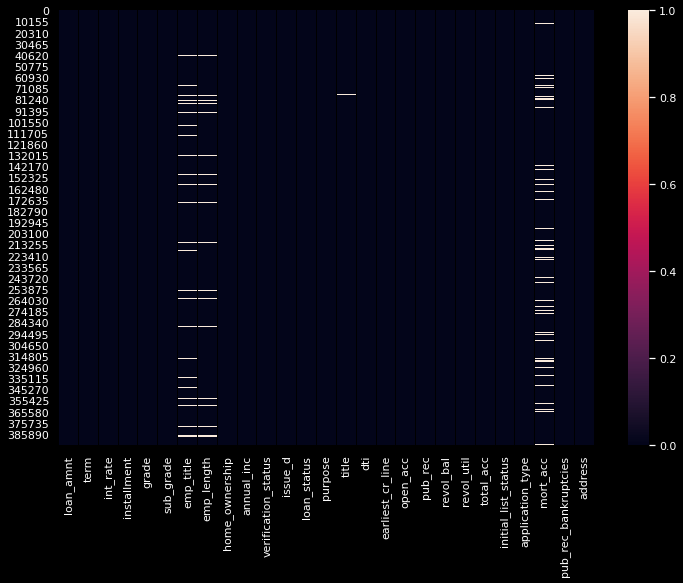

In [59]:
plt.figure(figsize=(12,8))
sns.heatmap(data.isna())
plt.show()

In [60]:
(data.isna().sum()/len(data))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

##### Employee Title

From our early exploration we saw that there are too many categories in employee title because of that we cant encode it. Thus we have to drop it.

In [61]:
data.drop('emp_title',axis=1,inplace=True)

##### Employee Length

From our data exploration we found out that the charged off percentage across all the categories is almost same. So we can drop this column too.


In [62]:
data.drop('emp_length',axis=1,inplace=True)

##### Title

In [63]:
data[['title','purpose']]

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
...,...,...
396025,Debt consolidation,debt_consolidation
396026,Debt consolidation,debt_consolidation
396027,pay off credit cards,debt_consolidation
396028,Loanforpayoff,debt_consolidation


As we can see title column and purpose column are same. we can simply drop title column since it has missing values.

In [64]:
data.drop('title',axis=1,inplace=True)

##### Mortgage Accounts

In [65]:
featureInfo('mort_acc')

mort_acc: Number of mortgage accounts.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Before Imputation')

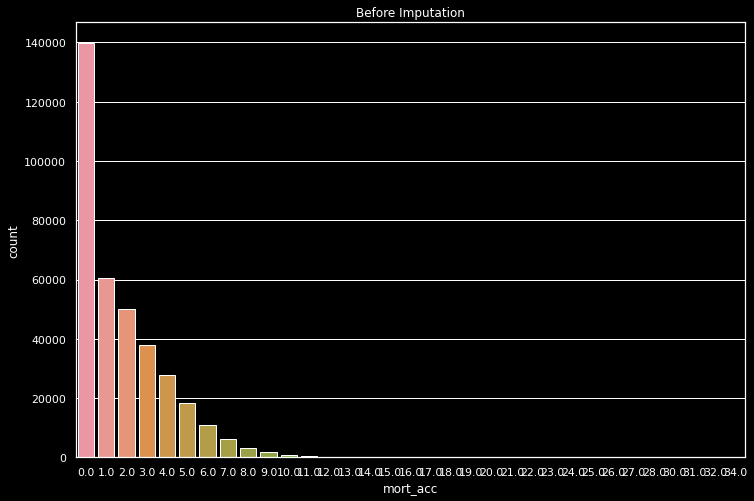

In [66]:
plt.figure(figsize=(12,8))
sns.countplot(data['mort_acc'])
plt.title("Before Imputation")

In [67]:
data['mort_acc'].isnull().sum()

37795

In [68]:
def impute(df, column):
  '''
  This function takes in the dataset and the column with missing data,
  and it fills the column with random sample of the same column.
  '''
  samples = df[column].dropna().sample(df[column].isnull().sum(), random_state = 0) # Fetching required number of samples from required column
  samples.index = df[df[column].isnull()].index
  df.loc[df[column].isnull(), column] = samples


In [69]:
impute(data, 'mort_acc')

In [70]:
data['mort_acc'].isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'After Imputation')

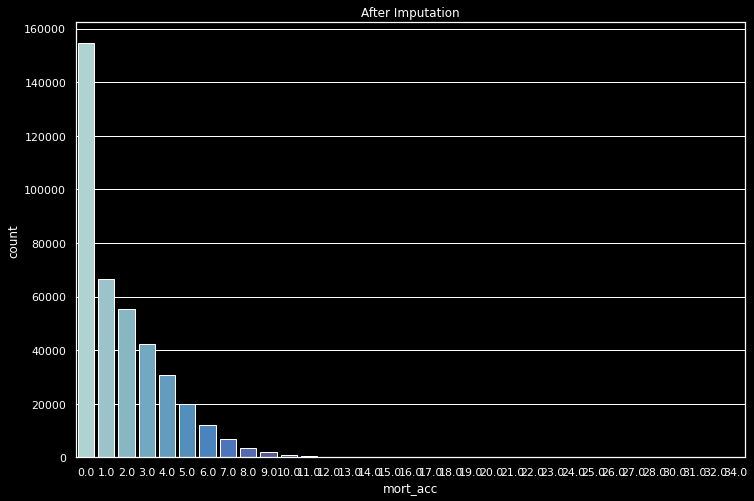

In [71]:
plt.figure(figsize=(12,8))
sns.countplot(data['mort_acc'],palette='icefire')
plt.title("After Imputation")

##### Other Missing data

Missing data from other columns are very less, so will just drop the rows containing the missing data.

In [72]:
data.dropna(axis=0,inplace=True)

In [73]:
data.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

#### Dealing with categorical data

In [74]:
data.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

##### Term

In [75]:
data['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [76]:
data['term'] = data['term'].apply(lambda term: int(term.split(' ')[1]))

In [77]:
type(data['term'].iloc[777])

numpy.int64

##### Grade

From previous exploration we know that the group column is of no use since we already have the same information form the subgroup column. so we will drop the group column and encode the sub group column.

In [78]:
data.drop('grade',axis=1,inplace=True)

In [79]:
dummyData = pd.get_dummies(data['sub_grade'],drop_first=True)

In [80]:
dummyData

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
396026,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
396027,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
396028,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [81]:
data = pd.concat([data.drop('sub_grade',axis=1),dummyData],axis=1)

In [82]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

##### Verification Status, Application Type, Initial List Status, Purpose 

In [83]:
dummies = pd.get_dummies(data[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
data = data.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
data = pd.concat([data,dummies],axis=1)

In [84]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'A2', 'A3', 'A4', 'A5',
       'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2',
       'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4',
       'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],


##### Home Ownership

As per our early analysis we can combine the three categories together.


In [85]:
data['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [86]:
data['home_ownership']=data['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [87]:
dummies = pd.get_dummies(data['home_ownership'],drop_first=True)
data.drop('home_ownership',axis=1,inplace=True)
data = pd.concat([data,dummies],axis=1)

In [88]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2',
       'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4',
       'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1',
       'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT'],
 

##### Address

In [89]:
data['address'].iloc[0]

'0174 Michelle Gateway\r\nMendozaberg, OK 22690'

Every address will be unique so cant encode this data, however we have zipcode in the address. which can be striped out of the address and made into its own column.

In [90]:
data['zip_code'] = data['address'].apply(lambda x:x[-5:])

In [91]:
data['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [92]:
dummies = pd.get_dummies(data['zip_code'],drop_first=True)
data.drop(['zip_code','address'],axis=1,inplace=True)
data = pd.concat([data,dummies],axis=1)

In [93]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4',
       'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1',
       'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',
    

##### Issue Date

We are trying to build a model which predict whether to give loan to a customer based on various data of that particular customer. So we provide the issue date to the model for training then the data will leak and it is not logical to provide that info to the model. So we will drop that column.

In [ ]:
featurInfo('issue_d')

In [94]:
data.drop('issue_d',inplace=True,axis=1)

##### Earliest Credit Card line 

In [97]:
featureInfo('earliest_cr_line')

earliest_cr_line: The month the borrower's earliest reported credit line was opened


In [104]:
data['earliest_cr_line'].iloc[:5]

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [105]:
data['earliest_cr_year'] = data['earliest_cr_line'].apply(lambda date:int(date[-4:]))
data = data.drop('earliest_cr_line',axis=1)

##### Loan Status

In [108]:
dummies = pd.get_dummies(data['loan_status'],drop_first=True)
data.drop(['loan_status'],axis=1,inplace=True)
data = pd.concat([data,dummies],axis=1)

In [109]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2',
       'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4',
       'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1',
       'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',
       '11650', '22690', '29597', '30723', '48052', '7046

In [111]:
data.rename(columns={'Fully Paid' :'loan_status' },inplace=True)

### Train Test Split

In [112]:
from sklearn.model_selection import train_test_split

In [115]:
X = data.drop('loan_status',axis=1).values
y = data['loan_status'].values

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Feature Scaling

In [116]:
from sklearn.preprocessing import MinMaxScaler

In [117]:
scaler = MinMaxScaler()

In [119]:
X_train = scaler.fit_transform(X_train)

In [120]:
X_test = scaler.transform(X_test)

### Model Creation

In [121]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [123]:
model = Sequential()

# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [124]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
1236/1236 [==============================] - 5s 3ms/step - loss: 0.3001 - val_loss: 0.2615
Epoch 2/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2661 - val_loss: 0.2606
Epoch 3/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2637 - val_loss: 0.2597
Epoch 4/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2622 - val_loss: 0.2596
Epoch 5/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2615 - val_loss: 0.2591
Epoch 6/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2609 - val_loss: 0.2591
Epoch 7/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2605 - val_loss: 0.2590
Epoch 8/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2601 - val_loss: 0.2586
Epoch 9/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2599 - val_loss: 0.2592
Epoch 10/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.259

#### Saving Model

In [125]:
from tensorflow.keras.models import load_model

In [143]:
model.save('LCLA_V1.h5')  

### Model Evaluation

In [126]:
losses = pd.DataFrame(model.history.history)

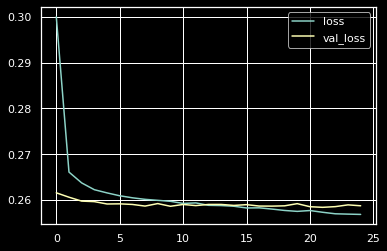

In [127]:
losses[['loss','val_loss']].plot()

In [128]:
from sklearn.metrics import classification_report,confusion_matrix

In [129]:
predictions = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [130]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.46      0.62     15421
           1       0.88      0.99      0.93     63623

    accuracy                           0.89     79044
   macro avg       0.91      0.73      0.78     79044
weighted avg       0.89      0.89      0.87     79044



In [131]:
confusion_matrix(y_test,predictions)

array([[ 7125,  8296],
       [  499, 63124]])

### Predicting for a new customer

In [140]:
import random
random.seed(42)
random_ind = random.randint(0,len(data))

new_customer = data.drop('loan_status',axis=1).iloc[random_ind]
new_customer

loan_amnt           22000.00
term                   36.00
int_rate                6.62
installment           675.49
annual_inc          77431.00
                      ...   
48052                   1.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1987.00
Name: 335936, Length: 78, dtype: float64

In [141]:
model.predict_classes(new_customer.values.reshape(1,78))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]], dtype=int32)

In [142]:
data.iloc[random_ind]['loan_status']

1.0